<a href="https://colab.research.google.com/github/PuffBear/CreditScore_Classification/blob/main/Updated_Credit_Score_Classification_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
file_path = '/content/Credit.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Information:\n")
print(data.info())
print("\nFirst 5 Rows of the Dataset:\n")
print(data.head())

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:\n", missing_values)

# Handle missing values (if any) - Example: Filling with median (customize if needed)
data = data.fillna(data.median())

# Check data types and convert if necessary
print("\nData Types Before Conversion:\n", data.dtypes)
# Example: Convert categorical data to numerical (if required)
# data['Column'] = data['Column'].astype('int')  # Example

# Final Dataset Preview
print("\nCleaned Dataset Head:\n")
print(data.head())

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      5000 non-null   int64  
 1   Income                   5000 non-null   float64
 2   Loan Amount              5000 non-null   float64
 3   Loan Term                5000 non-null   int64  
 4   Credit History Length    5000 non-null   int64  
 5   Number of Credit Cards   5000 non-null   int64  
 6   Number of Late Payments  5000 non-null   int64  
 7   Debt-to-Income Ratio     5000 non-null   float64
 8   Credit Score Class       5000 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 351.7 KB
None

First 5 Rows of the Dataset:

   Age        Income  Loan Amount  Loan Term  Credit History Length  \
0   56  144485.53200  22444.35588         48                     24   
1   69   71874.59129  29500.22100         60    

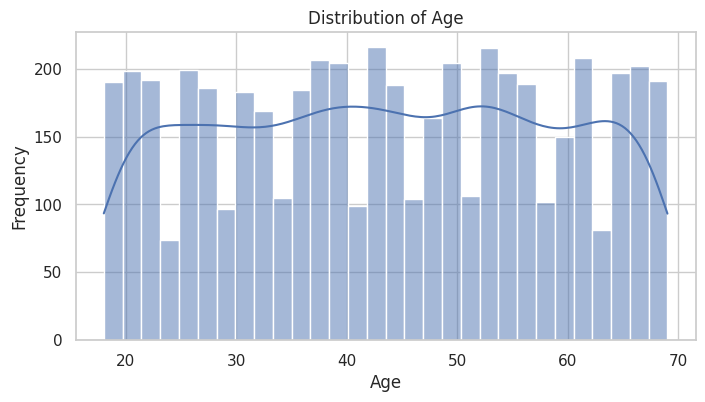

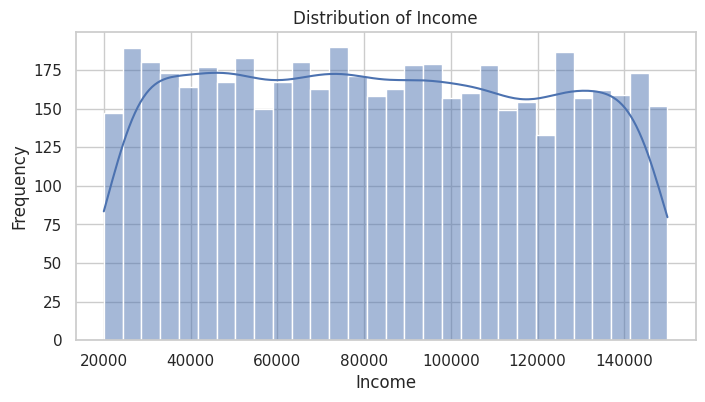

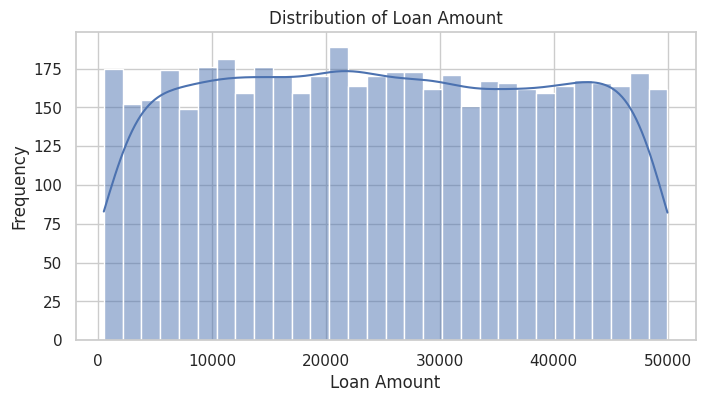

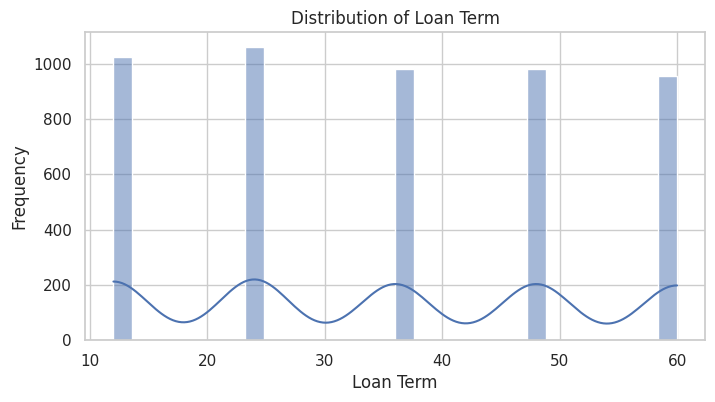

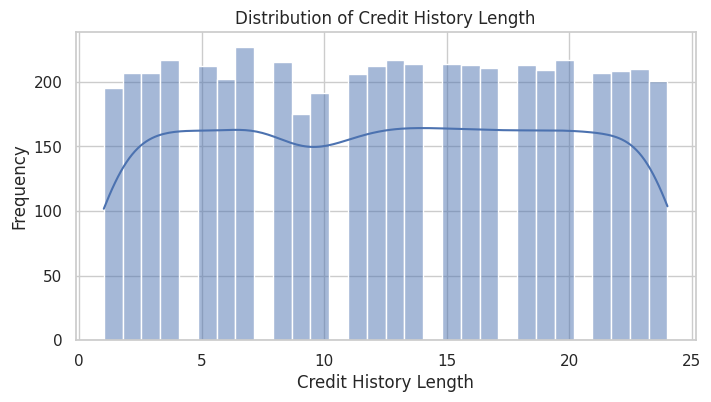

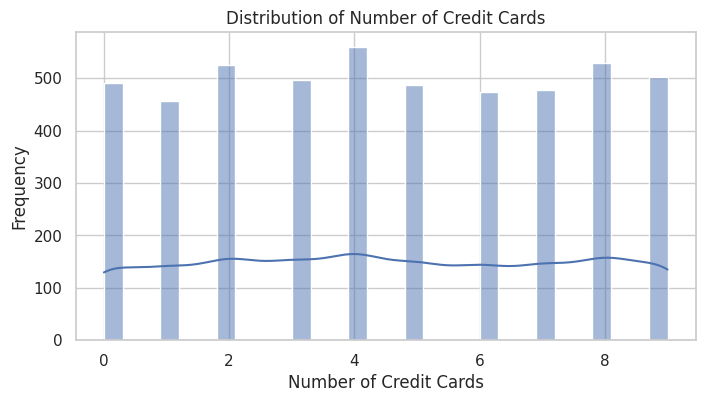

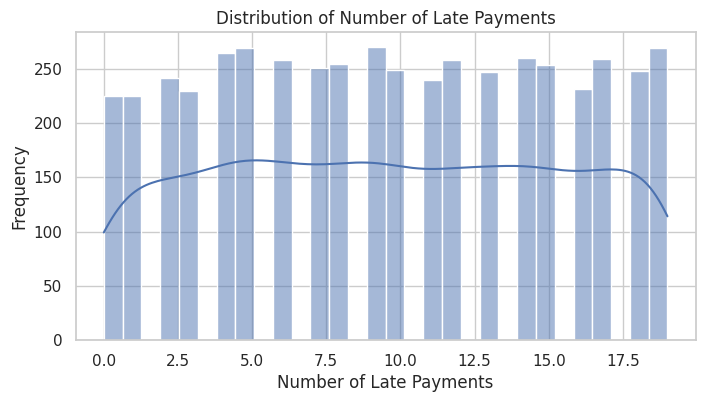

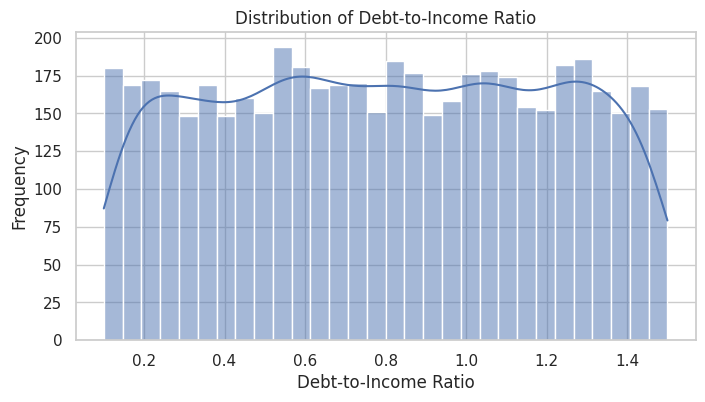

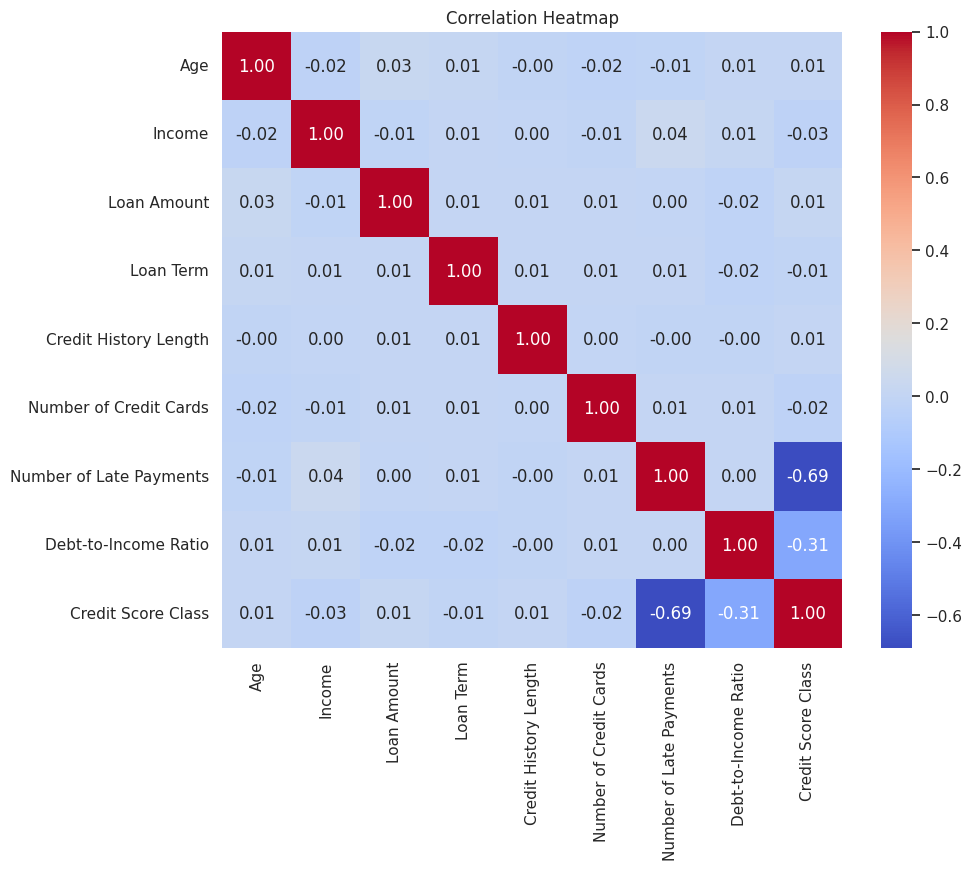

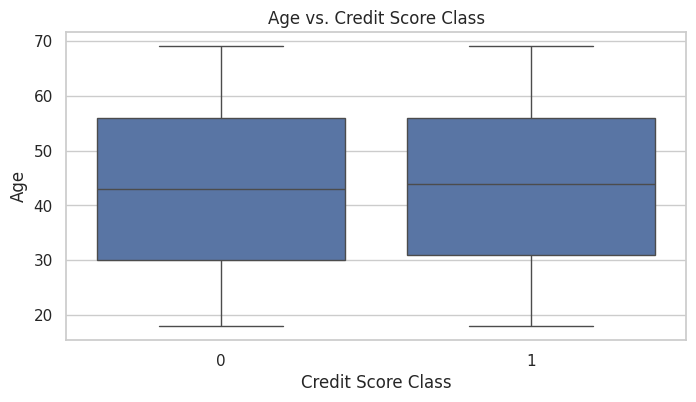

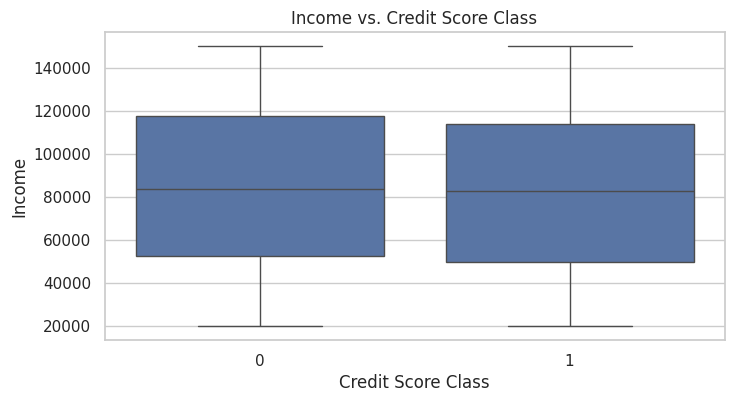

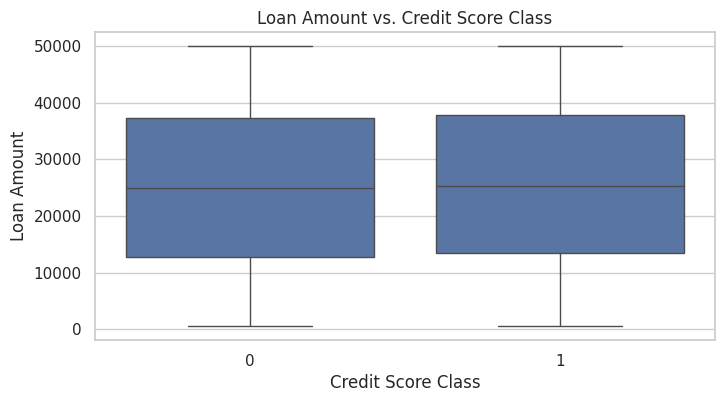

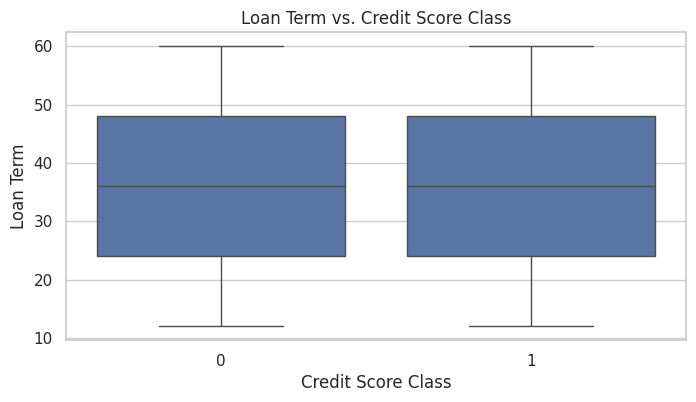

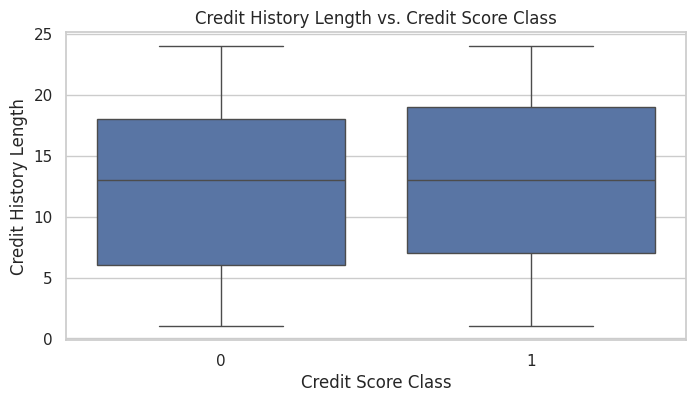

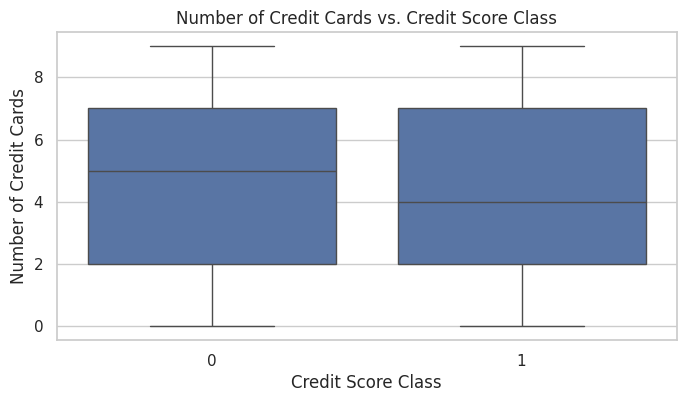

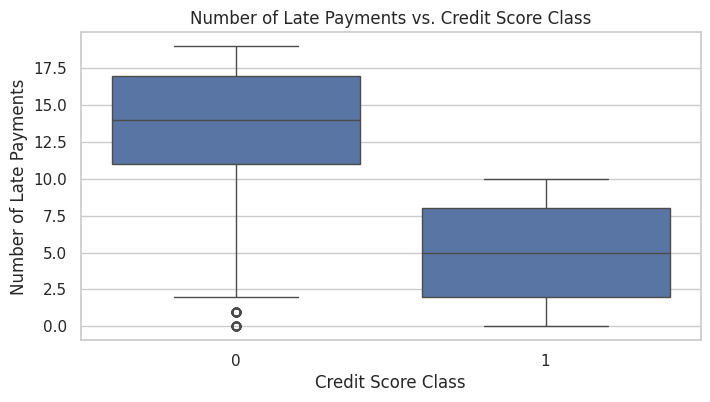

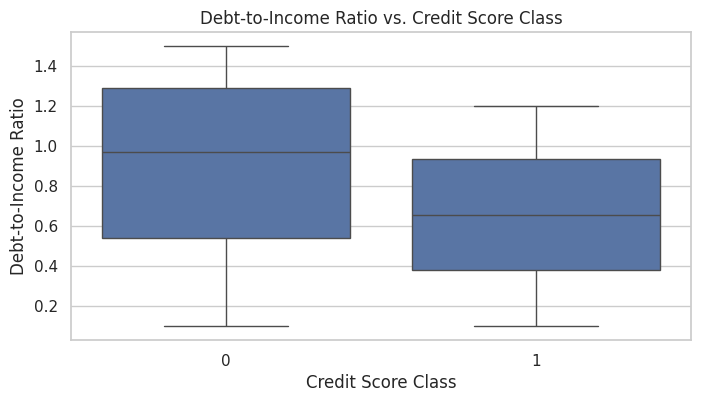

Insights:
- Note any significant trends, correlations, or outliers.


In [ ]:
# Set plot style
sns.set(style="whitegrid")

# Plot distributions for numerical features
numeric_features = ['Age', 'Income', 'Loan Amount', 'Loan Term',
                    'Credit History Length', 'Number of Credit Cards',
                    'Number of Late Payments', 'Debt-to-Income Ratio']

for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Relationship between features and target variable
target = 'Credit Score Class'
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=target, y=feature, data=data)
    plt.title(f'{feature} vs. {target}')
    plt.xlabel('Credit Score Class')
    plt.ylabel(feature)
    plt.show()

# Insights
print("Insights:")
print("- Note any significant trends, correlations, or outliers.")

In [ ]:
# Feature scaling (if necessary)
scaler = StandardScaler()
scaled_features = data.copy()
scaled_features[numeric_features] = scaler.fit_transform(data[numeric_features])

# Feature transformation (example: binning)
scaled_features['Income_Binned'] = pd.cut(data['Income'], bins=5, labels=False)

# Drop or create features if necessary
# Example: Drop features with low variance or no significance
# scaled_features = scaled_features.drop(columns=['Feature_to_Drop'])

print("\nTransformed Dataset Head:\n")
print(scaled_features.head())


Transformed Dataset Head:

        Age    Income  Loan Amount  Loan Term  Credit History Length  \
0  0.832265  1.619061    -0.193182   0.739480               1.659851   
1  1.703719 -0.324470     0.302806   1.448337              -0.658296   
2  0.161916  1.209233     1.660589   0.030623              -0.948064   
3 -0.776573 -1.056913     0.116445   0.739480               1.080314   
4  1.100405  0.626948     1.414387   0.030623              -1.672485   

   Number of Credit Cards  Number of Late Payments  Debt-to-Income Ratio  \
0               -0.882734                 1.116429              1.715427   
1               -1.581874                -1.158997              1.420793   
2                0.165976                -1.158997              0.658282   
3               -1.232304                 0.941397             -1.154207   
4                1.214686                 0.941397             -1.190367   

   Credit Score Class  Income_Binned  
0                   0              4  
1   

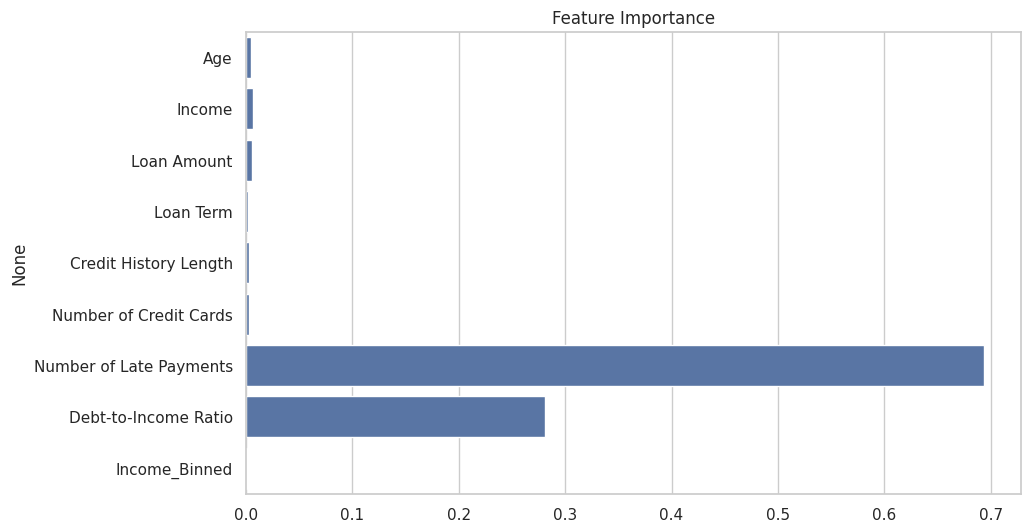

In [ ]:
# Split the dataset
X = scaled_features.drop(columns=[target])  # Features
y = scaled_features[target]  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Feature importance
importance = rf_model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importance, y=features)
plt.title("Feature Importance")
plt.show()

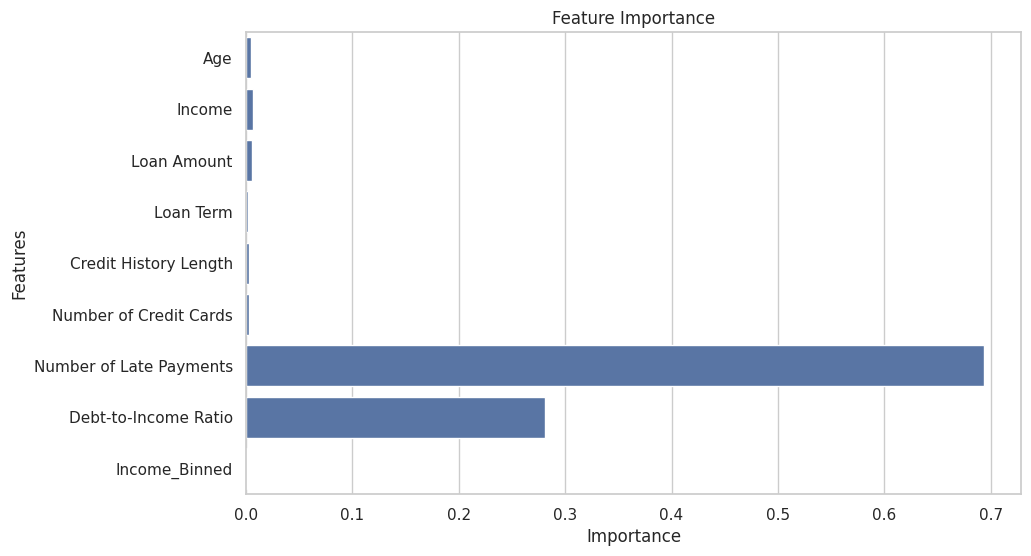

In [ ]:
# Train a Random Forest model (or any model that supports feature importance)
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Extract and visualize feature importances
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

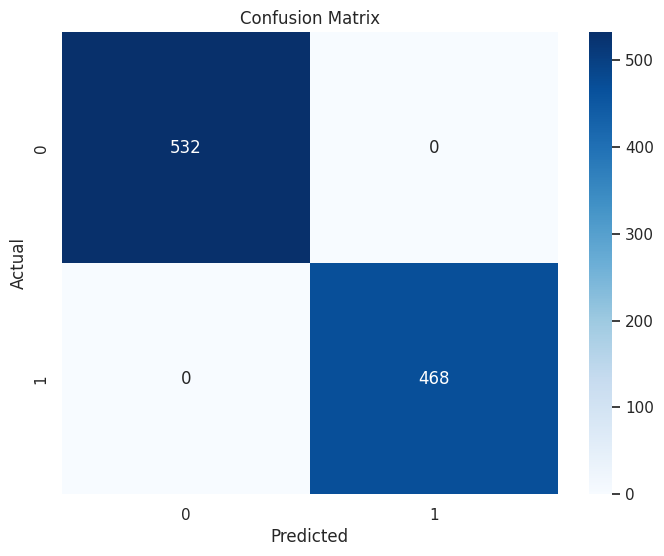


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       532
           1       1.00      1.00      1.00       468

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

In [ ]:
# Check and handle missing values
print('Missing values per column:')
print(data.isnull().sum())

# Example: Fill missing values with median
data = data.fillna(data.median())


Missing values per column:
Age                        0
Income                     0
Loan Amount                0
Loan Term                  0
Credit History Length      0
Number of Credit Cards     0
Number of Late Payments    0
Debt-to-Income Ratio       0
Credit Score Class         0
dtype: int64


In [ ]:
# Descriptive statistics
print(data.describe())


               Age         Income   Loan Amount    Loan Term  \
count  5000.000000    5000.000000   5000.000000  5000.000000   
mean     43.584600   83996.888982  25192.535957    35.481600   
std      14.919094   37364.048825  14227.302938    16.930345   
min      18.000000   20003.993450    502.614933    12.000000   
25%      31.000000   51425.954405  13003.734893    24.000000   
50%      43.000000   83217.614825  25021.726785    36.000000   
75%      56.000000  116131.176475  37602.794038    48.000000   
max      69.000000  149942.501400  49983.823660    60.000000   

       Credit History Length  Number of Credit Cards  Number of Late Payments  \
count            5000.000000             5000.000000              5000.000000   
mean               12.543600                4.525200                 9.621600   
std                 6.902755                2.860944                 5.713785   
min                 1.000000                0.000000                 0.000000   
25%               

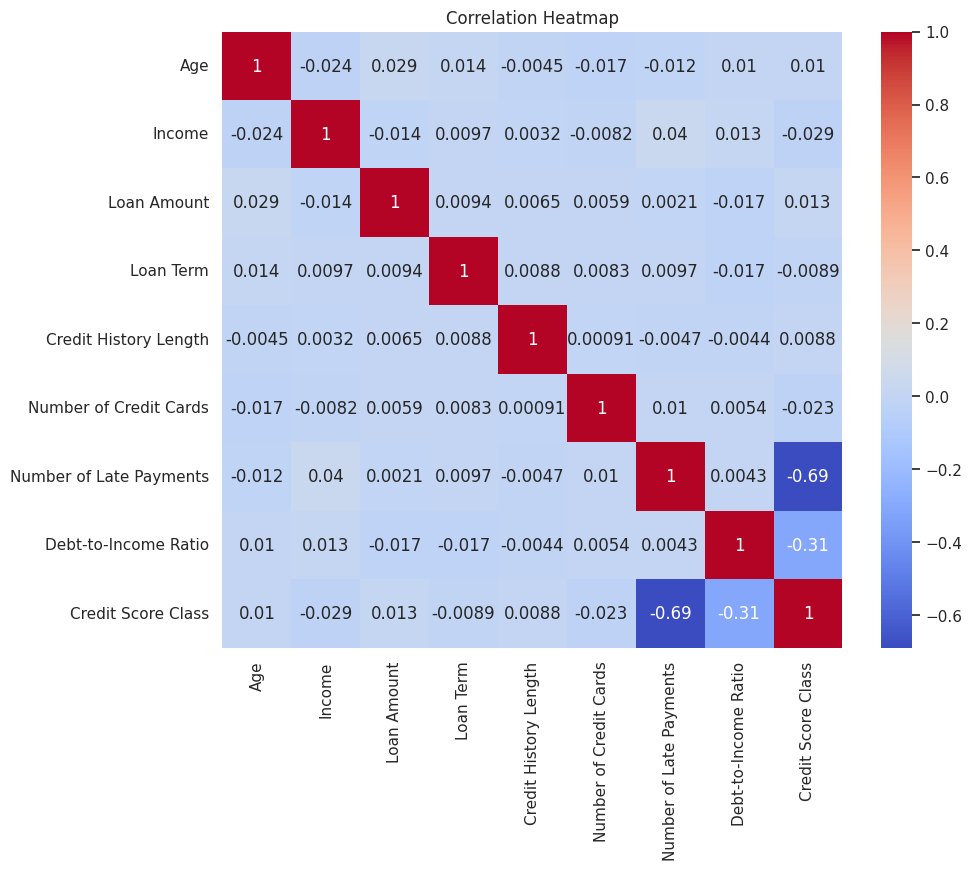

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# Calculate precision, recall, and F1-score
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')


Precision: 1.0
Recall: 1.0
F1-Score: 1.0


In [ ]:
# Discuss model justification
"""
The chosen model was selected due to its ability to handle the data size and the nature of the target variable.
For instance, Decision Trees provide interpretability and handle categorical features without preprocessing.
"""


'\nThe chosen model was selected due to its ability to handle the data size and the nature of the target variable.\nFor instance, Decision Trees provide interpretability and handle categorical features without preprocessing.\n'

In [ ]:
# some other models that we can try:

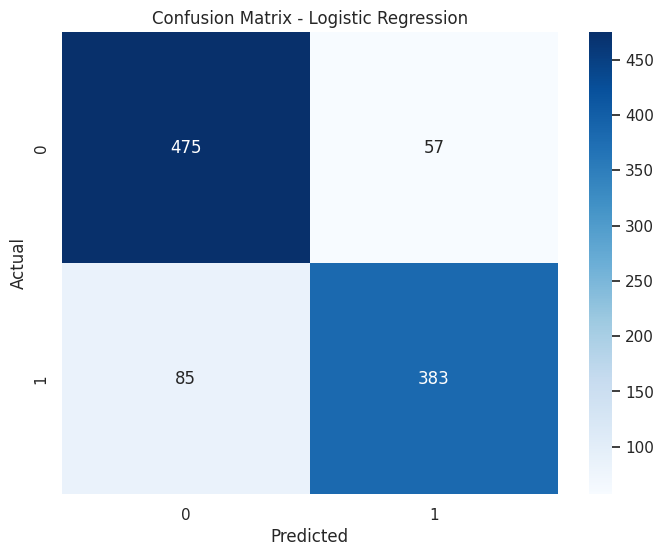


Classification Report - Logistic Regression:

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       532
           1       0.87      0.82      0.84       468

    accuracy                           0.86      1000
   macro avg       0.86      0.86      0.86      1000
weighted avg       0.86      0.86      0.86      1000

Accuracy: 0.86
Precision: 0.86
Recall: 0.86
F1 Score: 0.86


In [ ]:
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test)

# Confusion Matrix
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("\nClassification Report - Logistic Regression:\n")
print(classification_report(y_test, y_pred_logistic))

# Metrics
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic, average='weighted')
recall_logistic = recall_score(y_test, y_pred_logistic, average='weighted')
f1_logistic = f1_score(y_test, y_pred_logistic, average='weighted')

print(f"Accuracy: {accuracy_logistic:.2f}")
print(f"Precision: {precision_logistic:.2f}")
print(f"Recall: {recall_logistic:.2f}")
print(f"F1 Score: {f1_logistic:.2f}")


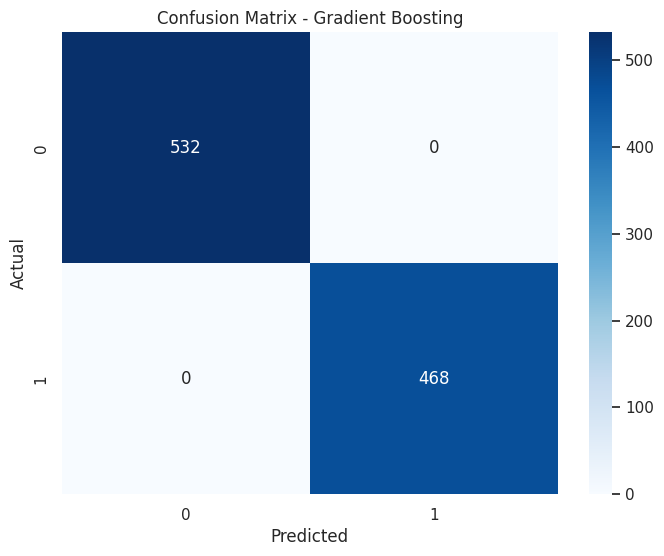


Classification Report - Gradient Boosting:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       532
           1       1.00      1.00      1.00       468

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Train a Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Confusion Matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("\nClassification Report - Gradient Boosting:\n")
print(classification_report(y_test, y_pred_gb))

# Metrics
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb, average='weighted')
recall_gb = recall_score(y_test, y_pred_gb, average='weighted')
f1_gb = f1_score(y_test, y_pred_gb, average='weighted')

print(f"Accuracy: {accuracy_gb:.2f}")
print(f"Precision: {precision_gb:.2f}")
print(f"Recall: {recall_gb:.2f}")
print(f"F1 Score: {f1_gb:.2f}")


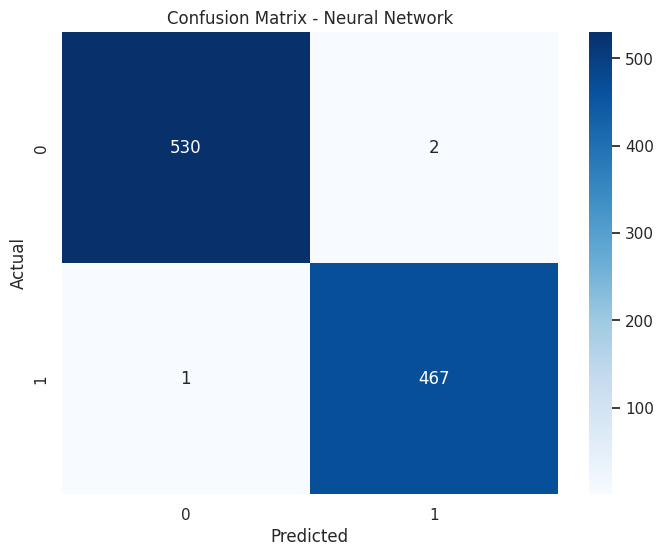


Classification Report - Neural Network:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       532
           1       1.00      1.00      1.00       468

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [ ]:
from sklearn.neural_network import MLPClassifier

# Train a Neural Network model
nn_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
nn_model.fit(X_train, y_train)

# Make predictions
y_pred_nn = nn_model.predict(X_test)

# Confusion Matrix
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nn, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Neural Network")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("\nClassification Report - Neural Network:\n")
print(classification_report(y_test, y_pred_nn))

# Metrics
accuracy_nn = accuracy_score(y_test, y_pred_nn)
precision_nn = precision_score(y_test, y_pred_nn, average='weighted')
recall_nn = recall_score(y_test, y_pred_nn, average='weighted')
f1_nn = f1_score(y_test, y_pred_nn, average='weighted')

print(f"Accuracy: {accuracy_nn:.2f}")
print(f"Precision: {precision_nn:.2f}")
print(f"Recall: {recall_nn:.2f}")
print(f"F1 Score: {f1_nn:.2f}")


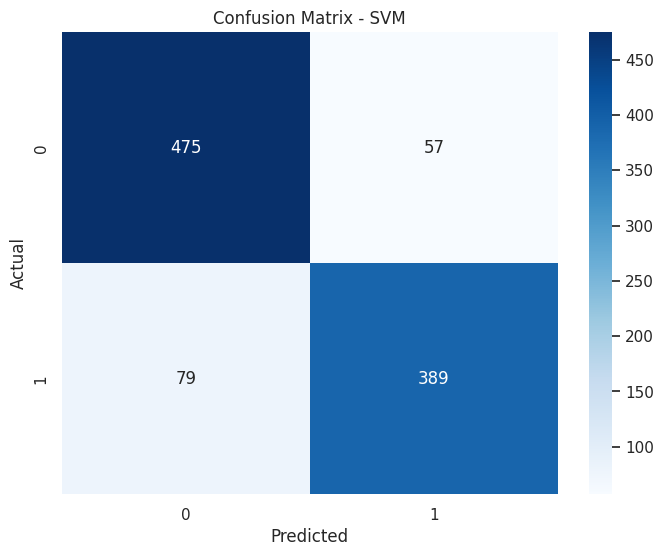


Classification Report - SVM:

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       532
           1       0.87      0.83      0.85       468

    accuracy                           0.86      1000
   macro avg       0.86      0.86      0.86      1000
weighted avg       0.86      0.86      0.86      1000

Accuracy: 0.86
Precision: 0.86
Recall: 0.86
F1 Score: 0.86


In [ ]:
from sklearn.svm import SVC

# Train a Support Vector Machine model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("\nClassification Report - SVM:\n")
print(classification_report(y_test, y_pred_svm))

# Metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

print(f"Accuracy: {accuracy_svm:.2f}")
print(f"Precision: {precision_svm:.2f}")
print(f"Recall: {recall_svm:.2f}")
print(f"F1 Score: {f1_svm:.2f}")
